## Basic Reinsurance on Discrete Examples

In [4]:
sys.path.append('c:\\s\\telos\\python\\aggregate_project')
from aggregate import build
build.logger_level(30)

time: 0 ns (started: 2022-07-06 20:41:05 -04:00)


,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,3.500,3.500,0.000,487.950m,487.950m,-333.067a,0.000
Freq,3.500,,,487.950m,,,0.000
Agg,12.250,12.250,222.045a,553.283m,553.283m,10.436f,286.888m


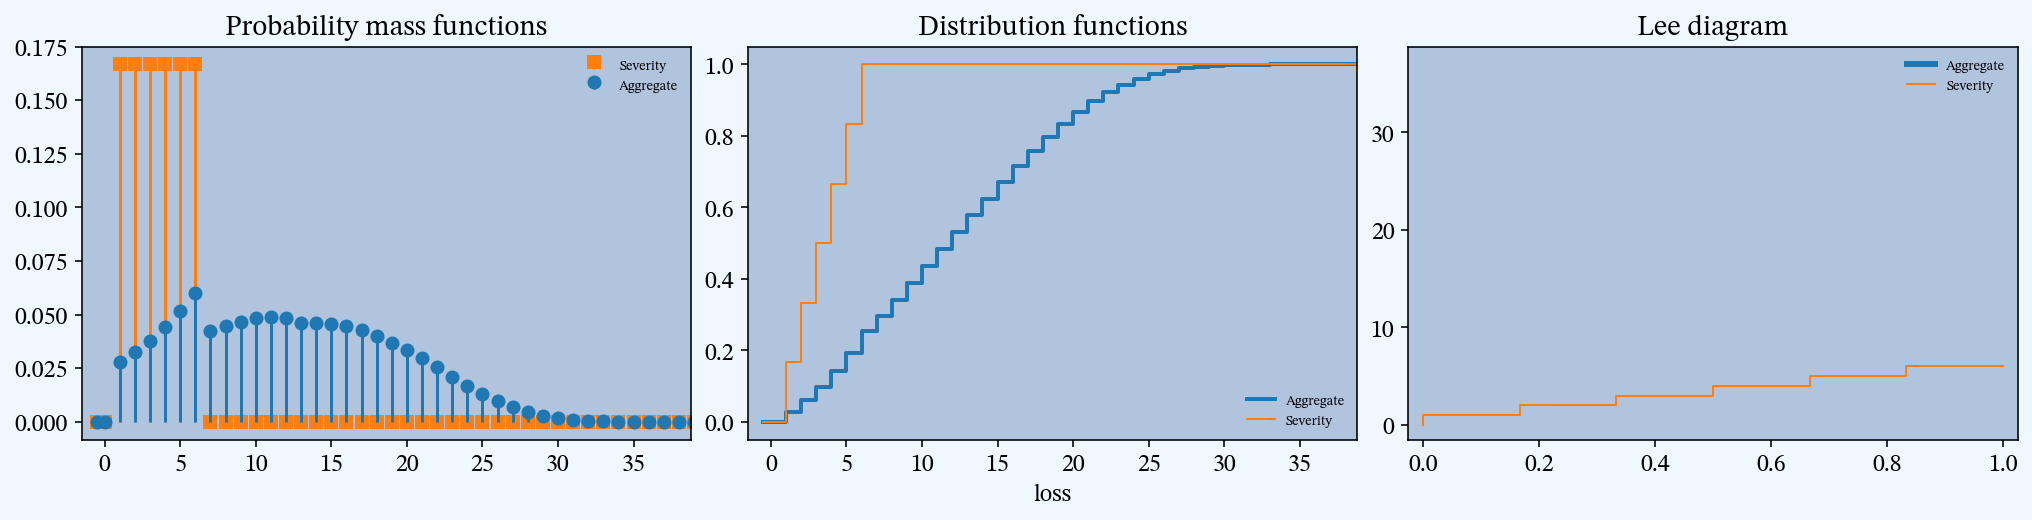

time: 532 ms (started: 2022-07-06 20:45:58 -04:00)


In [17]:
# dice of dice, gross for reference
dice_of_dice = build('agg DiceOfDice dfreq [1 2 3 4 5 6] dsev [1 2 3 4 5 6] ')
dice_of_dice.plot()
dice_of_dice

,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,3.500,3.000,-142.857m,487.950m,384.900m,-211.189m,0.000
Freq,3.500,,,487.950m,,,0.000
Agg,12.250,10.500,-142.857m,553.283m,529.550m,-42.895m,286.888m


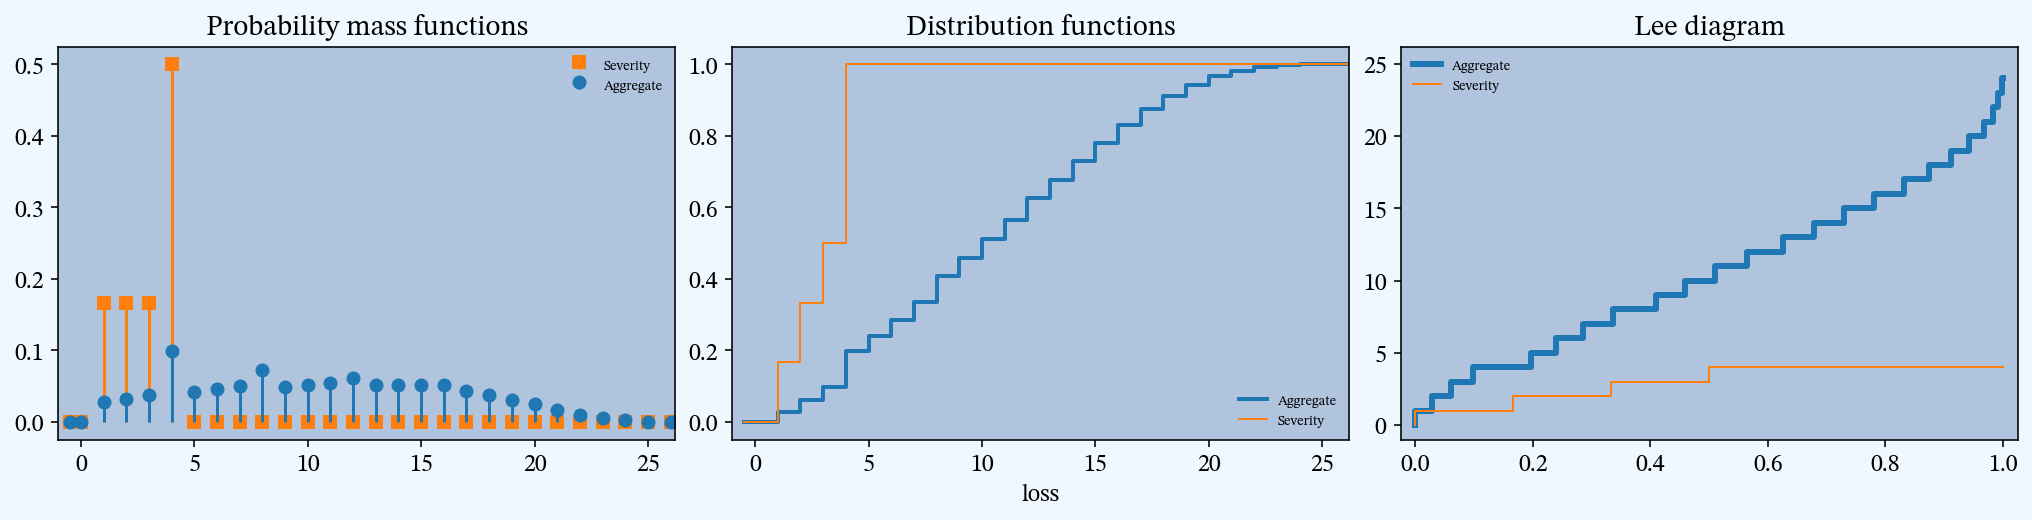

time: 516 ms (started: 2022-07-06 20:46:24 -04:00)


In [19]:
# dice of dice with occurrence reinsurance
dice_occ = build('agg DiceOcc dfreq [1 2 3 4 5 6] dsev [1 2 3 4 5 6] occurrence net of 2 x 4')
dice_occ.plot()
dice_occ

,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,3.500,3.500,0.000,487.950m,487.950m,-333.067a,0.000
Freq,3.500,,,487.950m,,,0.000
Agg,12.250,12.143,-8.703m,553.283m,540.055m,-23.909m,286.888m


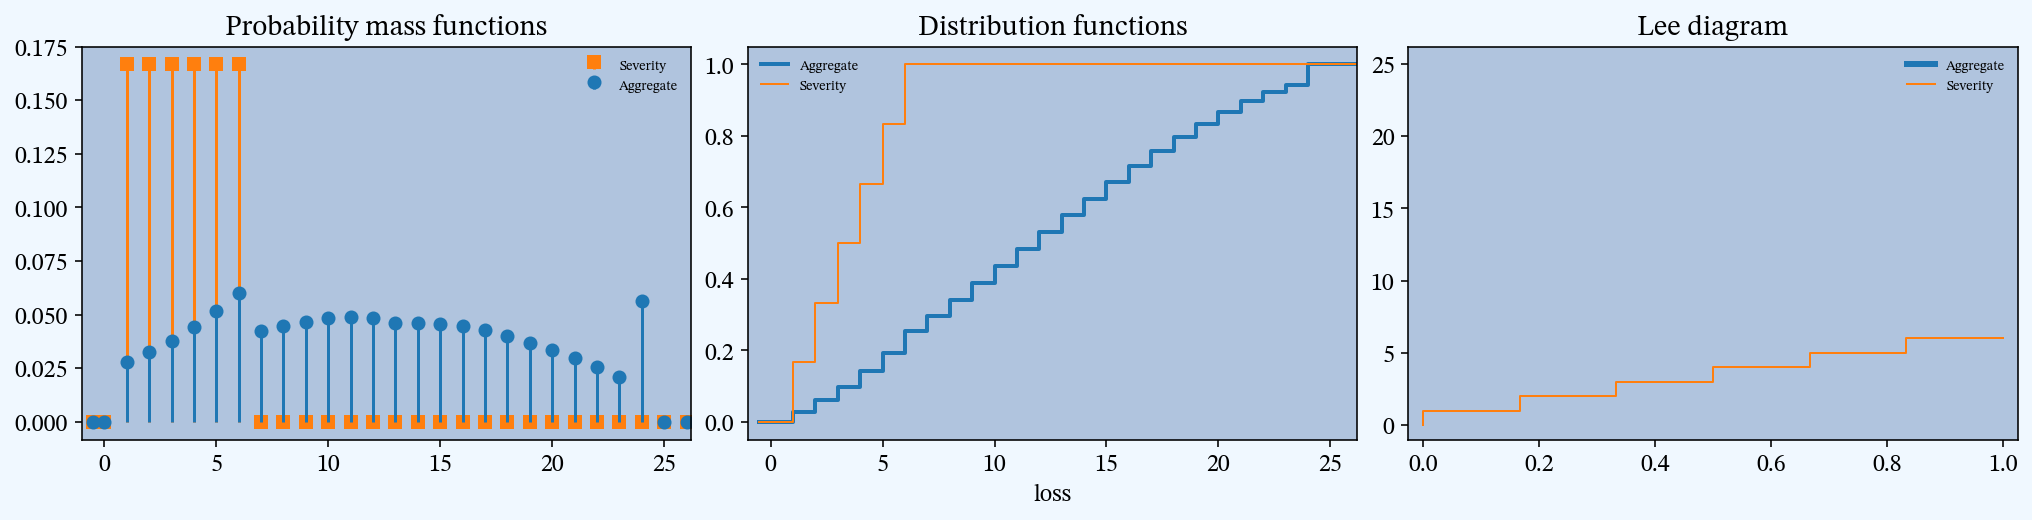

time: 609 ms (started: 2022-07-06 20:45:10 -04:00)


In [16]:
dice_ag = build('agg Dice2 dfreq [1 2 3 4 5 6] dsev [1 2 3 4 5 6] aggregate net of 12 x 24')
dice_ag.plot()
dice_ag

,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,3.500,3.000,-142.857m,487.950m,384.900m,-211.189m,0.000
Freq,3.500,,,487.950m,,,0.000
Agg,12.250,10.293,-159.775m,553.283m,505.929m,-85.587m,286.888m


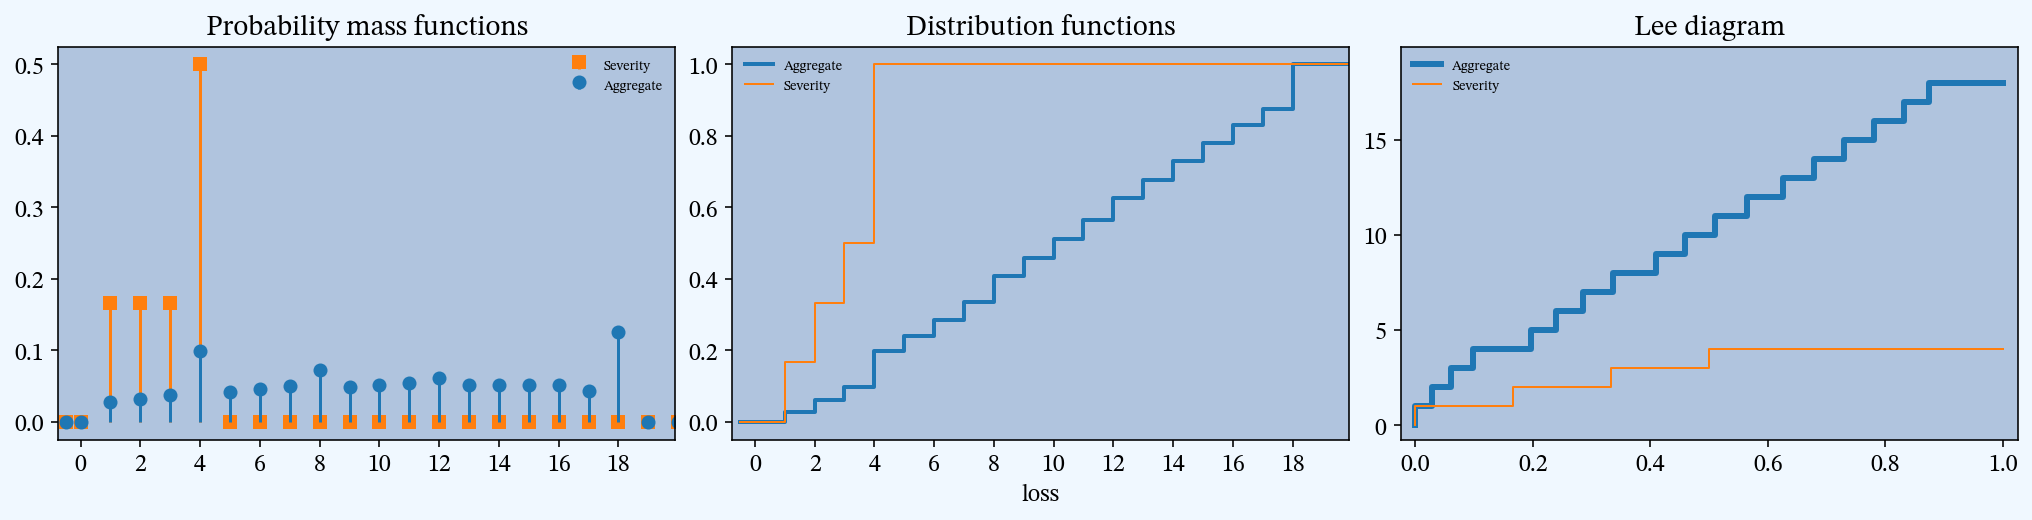

time: 547 ms (started: 2022-07-06 20:46:41 -04:00)


In [20]:
dice_re = build('agg DiceRe dfreq [1:6] dsev [1:6] occurrence net of 2 x 4 aggregate net of 6 xs 18')
dice_re.plot()
dice_re

### Sum of Uniforms is Triangular, with Reinsurance

,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,5.500,5.500,0.000,522.233m,522.233m,0.000,0.000
Freq,2.000,,,0.000,,,
Agg,11.000,11.000,0.000,369.274m,369.274m,0.000,0.000


,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,5.500,4.900,-109.091m,522.233m,441.968m,-153.697m,0.000
Freq,2.000,,,0.000,,,
Agg,11.000,9.800,-109.091m,369.274m,312.518m,-153.697m,0.000


,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,5.500,4.900,-109.091m,522.233m,441.968m,-153.697m,0.000
Freq,2.000,,,0.000,,,
Agg,11.000,8.800,-200.000m,369.274m,238.366m,-354.503m,0.000


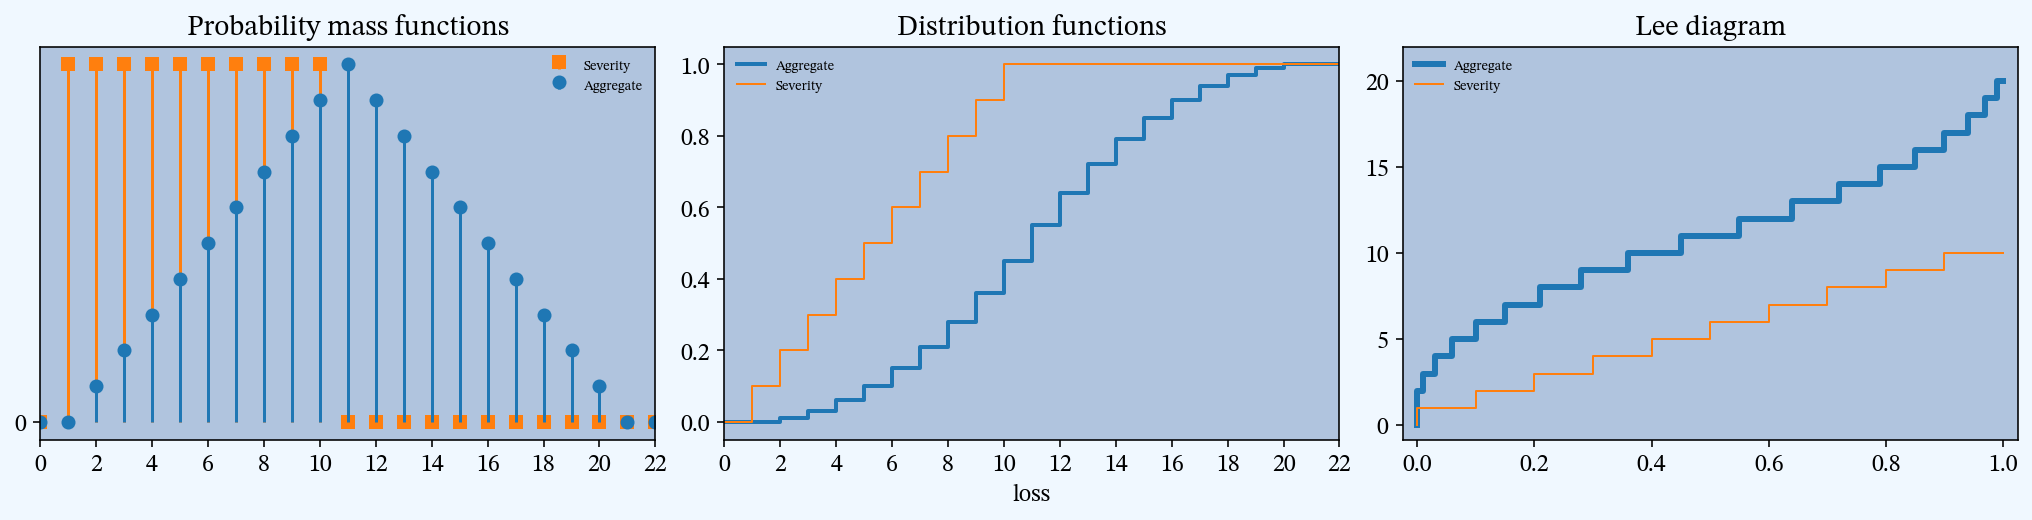

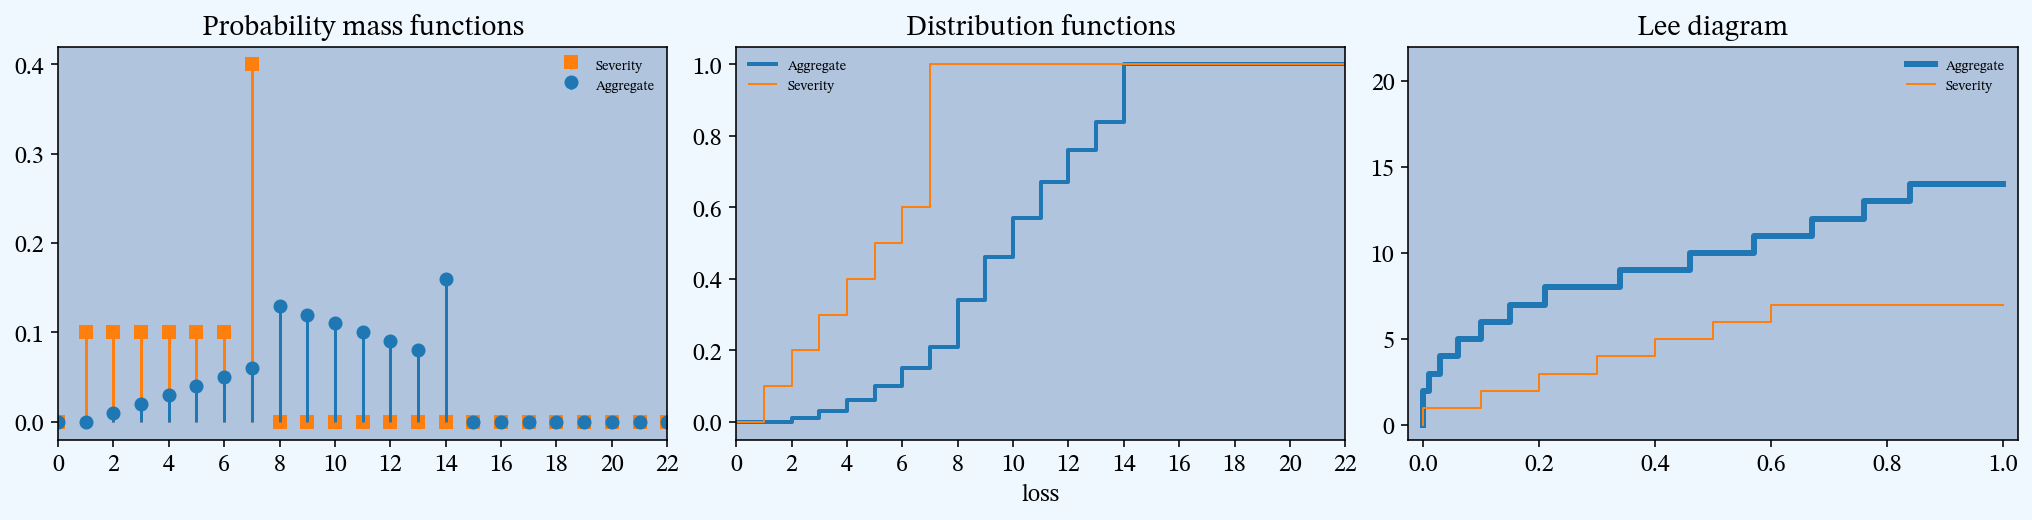

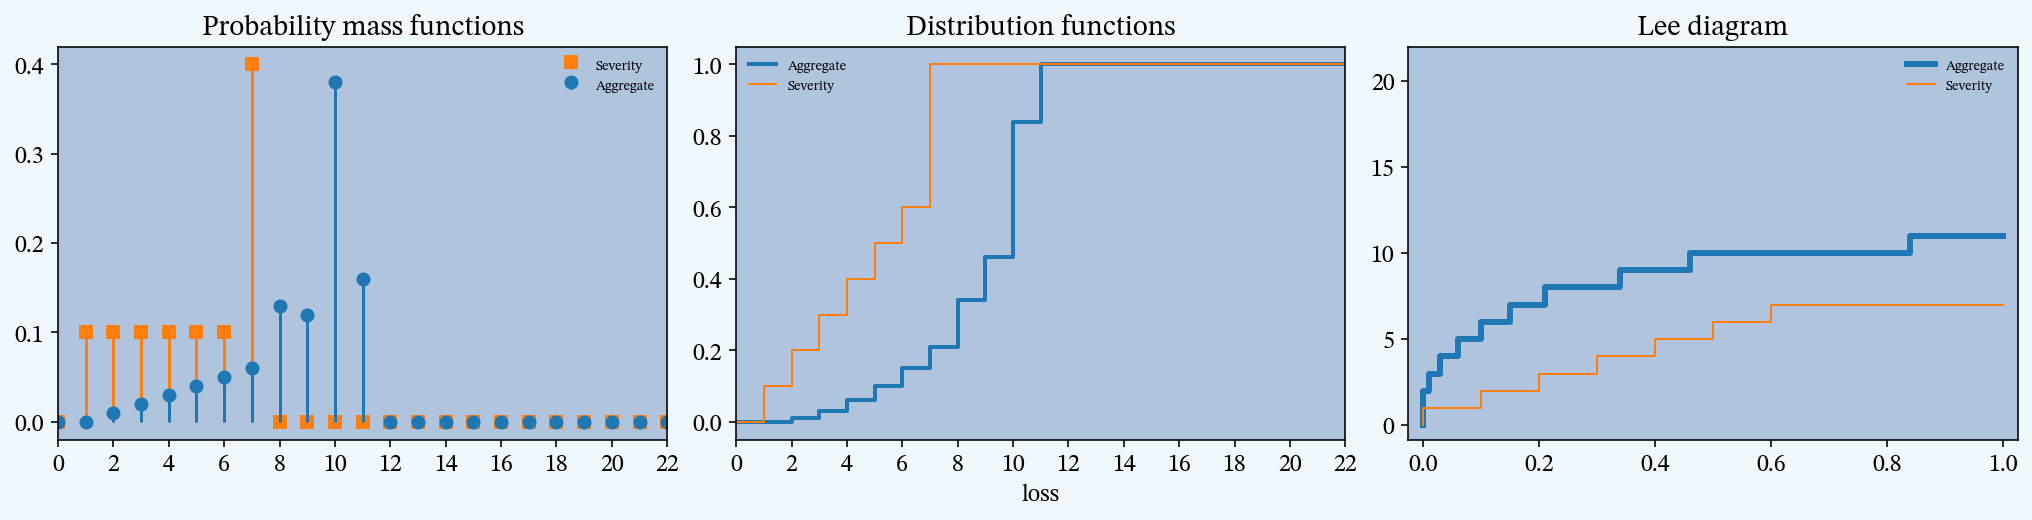

time: 1.73 s (started: 2022-07-06 20:47:32 -04:00)


In [21]:
# gross, net of occurrence, and net 
bg = build('agg GROSS dfreq [2] dsev [1:10]')
bno = build('agg NET_OCC dfreq [2] dsev [1:10] occurrence net of 3 x 7')
bn = build('agg NET dfreq [2] dsev [1:10] occurrence net of 3 x 7 aggregate net of 3 x 10')
for b in [bg, bno, bn]:
    display(b)
    b.plot()

# post process to rationalize the graphs
ml = bg.figure.axes[0].xaxis.get_major_locator()
my = bg.figure.axes[0].yaxis.get_major_locator()
yl = bg.figure.axes[2].get_ylim()
for b in [bg, bno, bn]:
    for ax in b.figure.axes[:2]:
        ax.set(xlim=[0, 22])
        if b is not bg:
            ax.xaxis.set_major_locator(ml)
    if b is not bg:
        b.figure.axes[2].yaxis.set_major_locator(my)
        b.figure.axes[2].set(ylim=yl)

\
\
Created July 6, 2022